# Modeling:
We want to use the decision tree algorithm on the carrier's historical data of users last year, such as t, users' serves information, calling duration, called duration … etc., to predict whether the user will be a potential contract user or not.

### Data Description:
- Data Set Characteristics: Multivariate
- Number of Instances:10000
- Area: Telecom
- Attribute Characteristics:Categorical, Integer
- Number of Attributes:13
- Date Created:2018-06-30
- Missing Values? No

### Data Description:
column name       | Description   |Unit| Type  | Valuse
--------------|---------|--------|-----
USER_ID     |a identifier for users | | int   |
SERVICE_KIND  |the service for telecom user| | string | 2G\3G\4G
CALL_DURATION|the average duration of user who call others|minitue| double
CALLED_DURATION|the average duration of user who is called by others|minitue|double
IN_PACKAGE_FLUX|the average used flux of user in the their flux package |MB| double
OUT_PACKAGE_FLUX|the average used flux of user out of the their flux package |MB| double
MONTHLY_ONLINE_DURATION|the average online duration for user monthly last year|Hour| double
NET_DURATION |the number of days of user who is online last year |Hour|long
LAST_RECHARGE_VALUE| the last recharge value of last year|Yuan | double
TOTAL_RECHARGE_VALUE|the total recharge value of user last year|Yuan|double
TOTAL_RECHARGE_COUNT|the total counts of user last year|| int
BALANCED| the balanced of user|Yuan|double
CONTRACTUSER_FLAG|whether the user is a contracter user|  | int| 0/1

# Reading data
Tasks:
1. import the comomon python module:
1. Read training data from the local computer.
    file name：carrier_contractuser.csv  
    encoding：utf8  
    sep： |  

3. show the first 5 rows of the data
 
Hint:using pd.read_csv() to read csv data into a DataFrame object

In [1]:
# import the comomon python module:
# numpy: The fundamental package for scientific computing with Python，usually be called as np for short
# pandas: An open source,  easy-to-use data structures and data analysis tools for the Python, usually be called as pd for short
# matplotlib.pyplot : a Python 2D plotting library,usually be be called as plt for short
# %matplotlib inline：IPython Magic Functions

#约4 lines code:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read training data from the local computer and show the first 5 rows of data.
data= pd.read_csv(r'datasets/carrier_contractuser.csv',encoding ='utf8',sep ='|')
data.head()

,USER_ID,SERVICE_KIND,CALL_DURATION,CALLED_DURATION,IN_PACKAGE_FLUX,OUT_PACKAGE_FLUX,MONTHLY_ONLINE_DURATION,NET_DURATION,LAST_RECHARGE_VALUE,TOTAL_RECHARGE_VALUE,TOTAL_RECHARGE_COUNT,BALANCED,CONTRACTUSER_FLAG
0,66069,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64410,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,60110,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,69600,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,64683,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


# Data exploring
Tasks:  
1. Display the data size and data basic information.
2. Compare the calling duration distribution of different users by parallel hisgrams.
3. Compare the called duration distribution of different usersby parallel hisgrams .
4. Compare the service types of different users by side-by-side bar graph.

Hint: 
1. using dataframe.shape atrribute to show the size of data
1. using dataframe.info() method to show the information

In [3]:
# Display the data size and data basic information.
# About 2 line code:
print('The size of the data is:',data.shape)

data.info()

The size of the data is: (10000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
USER_ID                    10000 non-null int64
SERVICE_KIND               10000 non-null object
CALL_DURATION              10000 non-null float64
CALLED_DURATION            10000 non-null float64
IN_PACKAGE_FLUX            10000 non-null float64
OUT_PACKAGE_FLUX           10000 non-null float64
MONTHLY_ONLINE_DURATION    10000 non-null float64
NET_DURATION               10000 non-null float64
LAST_RECHARGE_VALUE        10000 non-null float64
TOTAL_RECHARGE_VALUE       10000 non-null float64
TOTAL_RECHARGE_COUNT       10000 non-null float64
BALANCED                   10000 non-null float64
CONTRACTUSER_FLAG          10000 non-null int64
dtypes: float64(10), int64(2), object(1)
memory usage: 1015.7+ KB


### Compare the calling duration distribution of different users by parallel hisgrams.

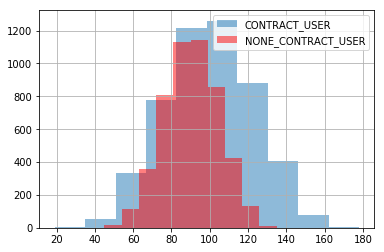

In [4]:
# set the boolen indexing for contrachter user
# Hint: data[column_name] == value
cond = data['CONTRACTUSER_FLAG']==1

# Plot the historgram about the column of CALL_DURATION from contrachter user
# Hint：dataframe.hist() method to plot a histgram
data[cond]['CALL_DURATION'].hist(alpha =0.5,label='CONTRACT_USER')


# Plot the historgram about the column of  CALL_DURATION from none contrachter user
data[~cond]['CALL_DURATION'].hist(color='r',alpha = 0.5,
                            label='NONE_CONTRACT_USER')

# show the labels for the plots
# Hint: plt.legend() method to show the labels
plt.legend()

### Compare the called duration distribution of different users by parallel hisgrams.

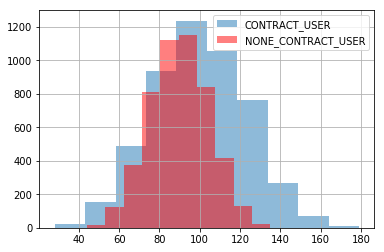

In [5]:
# set the boolen indexing for contrachter user
# Hint: data[column_name] == value
cond = data['CONTRACTUSER_FLAG']==1

# Plot the historgram about the column of CALLED_DURATION from contrachter user
# Hint：dataframe.hist() method to plot a histgram
data[cond]['CALLED_DURATION'].hist(alpha =0.5,label='CONTRACT_USER')

# Plot the historgram about the column of  CALLED_DURATION from none contrachter user
data[~cond]['CALLED_DURATION'].hist(color='r',alpha = 0.5,
                            label='NONE_CONTRACT_USER')

# show the labels for the plots
# Hint: plt.legend() method to show the labels
plt.legend()

### Compare the service types of different users by side-by-side bar graph.

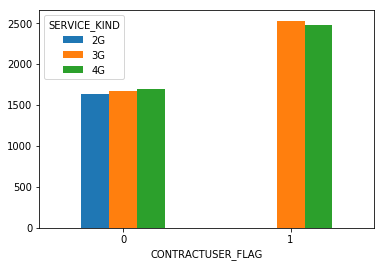

In [6]:
# Group the data by CONTRACTUSER_FLAG and SERVICE_KIND and then plot a side-by-side bar graph.
# Hint: 
#using dataframe.groupby() mehod to group the data
#using unstack() method 
#using dataframe.plot(kind='bar') method to plot a bar graph

grouped =data.groupby(['CONTRACTUSER_FLAG','SERVICE_KIND'])['USER_ID'].count().unstack()

grouped.plot(kind= 'bar',alpha =1.0,rot = 0)

### Display the sample balance  for different labels
Hint: using dataframe.value_counts() method

In [7]:
data['CONTRACTUSER_FLAG'].value_counts()

1    5003
0    4997
Name: CONTRACTUSER_FLAG, dtype: int64

### Relationship between calling duration (minutes) & in-package data usage and contract user potential

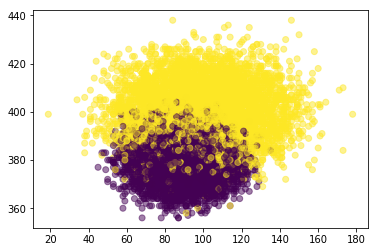

In [8]:
y = data.loc[:,'CONTRACTUSER_FLAG']
plt.scatter(data.loc[:,'CALL_DURATION'],data.loc[:,'IN_PACKAGE_FLUX'],c=y,alpha=0.5)

#  Feature engineering(Data Preprocessing)
Tasks:
1. Split the feature data sets and label data set and show the size of the features and label data.
2. One-hot-encoding for categorical feature of SERVICE_KIND

Hint:
1. usiing dataframe.iloc[] mehtod or .loc[] metho to select columns from dataframe 

### Split the feature data sets and label data set.

In [9]:
X = data.loc[:,'SERVICE_KIND':'BALANCED']
y= data.loc[:,'CONTRACTUSER_FLAG']
print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}'.format(y.shape))

The shape of X is (10000, 11)
The shape of y is (10000,)


### One-hot-encoding for categorical feature of SERVICE_KIND
1. Encode labels with value between 0 and n_classes-1 
2. OneHotEncoder() for differnet values

In [10]:
# Encode labels with value between 0 and n_classes-1 
# impoort LabelEncoder() method from sklearn.preprocessing
# impoort OneHotEncoder() method from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# create a instance of LabelEncoder
labelEncoder = LabelEncoder()

# train the labelEncoder on the whole data set
labelEncoder.fit(X.SERVICE_KIND)

# print the classes from  the valuse in SERVICE_KIND feature
print(labelEncoder.classes_)

#transfom the SERVICE_KIND feature into intergers
SERVICE_LABELCODER= labelEncoder.transform(X.SERVICE_KIND)

#show the first 5 item from SERVICE_KIND and SERVICE_LABELCODER
print(X.SERVICE_KIND[0:5].tolist())

print(SERVICE_LABELCODER[0:5])

['2G' '3G' '4G']
['3G', '3G', '3G', '4G', '4G']
[1 1 1 2 2]


In [11]:
# Using OncHotEncoder to convert categorical features into the 0/1 encoding type.
#Create a instance of OncHotEncoder
enc = OneHotEncoder()

# Hint: OneHotEncoder.fit() method need the input array be 2 dimesions, 
# so we can use ndarray.reshape((-1,1)) method to transofrom a 1 dimesion array of size= (n,) 
# to 2 dimesions array of size = (n,1)
SERVICE_ENC = enc.fit(SERVICE_LABELCODER.reshape((-1,1)))

# transform the SERVICE_LABELCODER into he 0/1 encoding type.
SERVICE_ENC = enc.transform(SERVICE_LABELCODER.reshape((-1,1)))

#print the features from SERVICE_LABELCODER
print(enc.active_features_)

#print the one-hot-encodeded values of the first 5 one-hot-encodeded items of the SERVIEC_KING column
#Hint: use to array() method to transform a sparse matrix into a dense matrix
print(SERVICE_ENC.toarray()[0:5])

[0 1 2]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [12]:
#create the the columns for this one-hot-encodeded array
column_ENC = labelEncoder.classes_

# create a dataframe for this one-hot-encodeded array
SERVICE_ENC_df = pd.DataFrame(SERVICE_ENC.toarray(),columns=column_ENC)

#show the first 5 rows of the dataframe
SERVICE_ENC_df.head()

,2G,3G,4G
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [13]:
# Concate the new dataframe from one-hot-encodering into the original dataset and drop the SERVICE_KIND feature
#Hint:
# using the pd.concat() method to concate two dataframe along axis =1, then using .drop() method to drop a column.
X_enc = pd.concat([X,SERVICE_ENC_df],axis = 1).drop('SERVICE_KIND',axis=1)

# show the first 5 rows of this new dataframe
X_enc.head()

,CALL_DURATION,CALLED_DURATION,IN_PACKAGE_FLUX,OUT_PACKAGE_FLUX,MONTHLY_ONLINE_DURATION,NET_DURATION,LAST_RECHARGE_VALUE,TOTAL_RECHARGE_VALUE,TOTAL_RECHARGE_COUNT,BALANCED,2G,3G,4G
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0.0,1.0,0.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0.0,1.0,0.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,0.0,1.0,0.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,0.0,0.0,1.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,0.0,0.0,1.0


# Trainning and evaluation a simple Decision Tree model 
Tasks:
1. Split the dataset into two parts: trainning(0.8) and testing datasets(0.2).
2. Trainning and evaluation a simple Decision Tree model on trainning dataset.
3. Evaluation a simple Decision Tree model on tesing dataset

Hint:  
1. using  train_test_split() method  from sklearn.model_selection import
2. For reproduction, using random state = 112 

### Train-test-split:
Split the dataset into two parts: trainning(0.8) and testing datasets(0.2).
Hint:  
1. using  train_test_split() method  from sklearn.model_selection import
2. For reproduction, using random state = 112 

In [14]:
# import train_test_split()  method from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the dataset into two parts: trainning(0.8) and testing datasets(0.2).
# For reproduction, using random state = 112, 
X_train,X_test,y_train,y_test = train_test_split(X_enc,y,test_size =0.2,
                                                 random_state=112)

# Print the size of training and tesint dataset 
print(X_train.shape)
print(X_test.shape)

(8000, 13)
(2000, 13)


### Trainning and evaluation a simple Decision Tree model on training dataset.

In [15]:
# from sklearn.tree import DecisionTreeClassifier() method
from sklearn.tree import DecisionTreeClassifier

# create an instance of DecisionTreeClassifier 
# and For reproduction,using random state = 113 
dt_clf =  DecisionTreeClassifier(random_state=113)

# trainning the DecisionTreeClassifier on the training dataset
dt_clf.fit(X_train,y_train)

# predicting the value on the testing dataset
y_pred = dt_clf.predict(X_test)

In [16]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=113,
            splitter='best')

### Evaluation a simple Decision Tree model on testing dataset

In [17]:
# from klearn import metrics module
from sklearn import metrics

# Calculate the accuracy_score and print it 
# Hint:metrics.accuracy_score() method
accuracy = metrics.accuracy_score(y_test,y_pred)
print('The accuracy_score of the model for testing data is:',accuracy)


#  Caculate the confusion matrix and print it 
# Hint: metrics.confusion_matrix() method
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
print('confusion_matrix is: \n',confusion_matrix)

The accuracy_score of the model for testing data is: 0.96
confusion_matrix is: 
 [[1002   36]
 [  44  918]]


# Decision Tree Model Parameter Optimization
Tasks:
1. Tuning the parameters of Decision tree 
2. Re-train the model using the optimized parameters.


# Tuning the parameters of Decision tree  
Major parameters that need tuning and relevant suggestions:
1.	min_samples_split: minimum number of samples required to split an internal node.
If the volume of the sample data set is small, this limit is not required. If the sample volume is large, you are advised to increase this value.
2.	min_samples_leaf: minimum number of samples required to be at a leaf node.
If the volume of the sample data set is small, this limit is not required.
If the sample volume is large, you are advised to increase this value. For your reference: In a past project with 100,000 samples, we set min_samples_leaf to 5.


In [18]:
# from sklearn.model_selection import GridSearchCV() method 
from sklearn.model_selection import GridSearchCV

# Create a Grid of parameters to Search
# Hint：to create a dicionary  as dict{'min_samples_split':range,'min_samples_leaf':range}
param_grid = {'min_samples_split':list(range(2,20,1)),
              'min_samples_leaf':list(range(1,10,1))}

# create an instance of DecisionTreeClassifier and For reproduction, using random state = 114 
estimator = DecisionTreeClassifier(random_state=114)

# Create a GridSearchCV instance
# Hint: using GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gsearch = GridSearchCV(estimator,param_grid = param_grid, scoring='accuracy',cv=5)

# Train the GridSearchCV on training datasets
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=114,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
# Display the best_score, best_params,best_estimator from GridSearchCV 
# Hint: using GridSearchCV.best_score_,GridSearchCV.best_params_,
# GridSearchCV.best_estimator_
print(gsearch.best_score_)
print(gsearch.best_params_)
print(gsearch.best_estimator_)

0.95725
{'min_samples_leaf': 2, 'min_samples_split': 17}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=17,
            min_weight_fraction_leaf=0.0, presort=False, random_state=114,
            splitter='best')


# Retrain the model with optimized  parameters on the whole trainning dataset

In [20]:
# create an instance of DecisionTreeClassifier with optimized parameters and For reproduction, 
# using random state = 115
# Hint: Using **gsearch.best_params_ as keyword parameters
best_clf =  DecisionTreeClassifier(**gsearch.best_params_,random_state=115)

# Retrain the model with optimized parameters on the whole trainning dataset
best_clf.fit(X_train,y_train)

# predicting the value on the testing dataset
y_pred_best = best_clf.predict(X_test)

# Calculate the accuracy_score and print it 
accuracy = metrics.accuracy_score(y_test,y_pred_best)
print('The accuracy score of the model for test data is: {0}'.format(accuracy))

#  Caculate the confusion matrix and print it 
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_best)
print('The confusion matrix is:\n ',confusion_matrix)

# print the report of the model:
#Hint: using metrics.classification_report() method
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_best))

The accuracy score of the model for test data is: 0.9615
The confusion matrix is:
  [[1000   38]
 [  39  923]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1038
          1       0.96      0.96      0.96       962

avg / total       0.96      0.96      0.96      2000



# Decision Tree Visualization
Hint: Install graphviz from https://graphviz.gitlab.io/download/ first

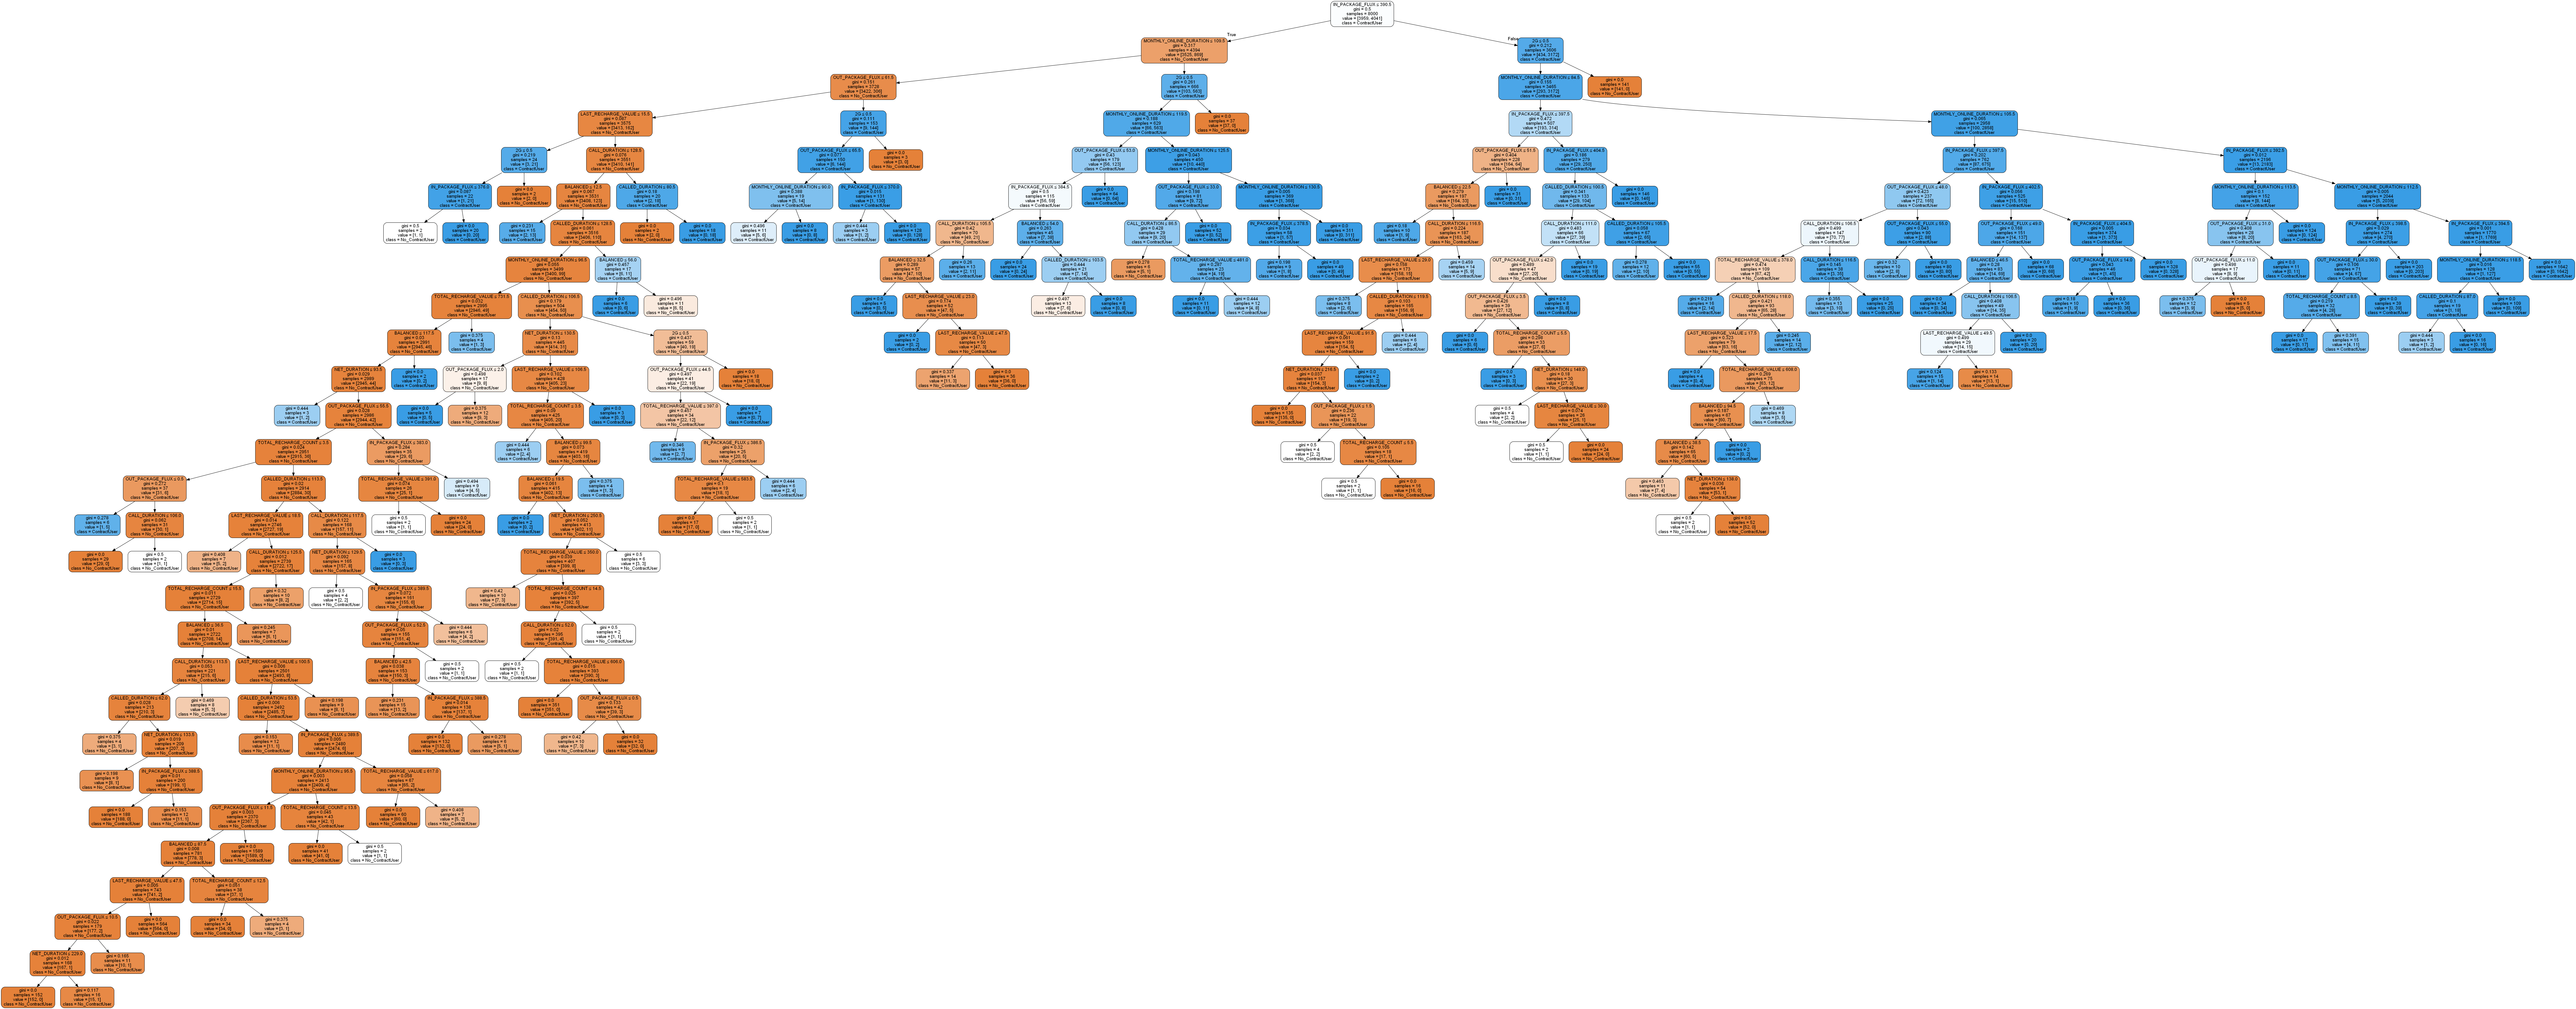

In [21]:
# import the pacakge for visualize the Decision tree model
from sklearn.tree import export_graphviz
import graphviz
import pydotplus 
from IPython.display import Image
# set the enviroment variable for graphviz
import os
os.environ["PATH"] += os.pathsep + \
'c:/Program Files (x86)/Graphviz2.38/bin/'

# set the feature names 
feature_names=X_enc.columns.tolist()

# set the label names
class_names=['No_ContractUser','ContractUser']

# save the modle into dot file
dot_data = export_graphviz(best_clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

# method 1: save to pdf file
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("carrier_decision_tree.pdf") 

# method 2: save to a image
image = graph.create_png()
with open('carrier_decision_tree.png','wb') as png:
    png.write(image)

# Display the image in Jupyter notebook
Image(image)

# Saving the trained model
Tasks: 
1. saving the trained model into pkl file
2. predicting the values by the loaded model and compare it with the origianl one

In [22]:
# from sklearn.externals  import.joblib
from sklearn.externals import joblib #pip install joblib

# saving the trained model into pkl file
joblib.dump(best_clf, 'DT_carrier.pkl')  #保存为pkl文件

['DT_carrier.pkl']

In [23]:
# load the trained model from pkl file
best_clf_02 = joblib.load('DT_carrier.pkl') 

# predicting the values by the loaded model and compare it with the origianl one
y_pred_best_02=best_clf.predict(X_test)

print('The number of different prediction between the original model and the loaded model is:',np.sum(np.abs(y_pred_best-y_pred_best_02)))

The number of different prediction between the original model and the loaded model is: 0
